<a href="https://colab.research.google.com/github/CarlosMourao/Hackathon_1_24H/blob/main/Cleaning_for_playlists.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ideas, maybe ToDo-s

- Sort the dataset by popularity, tempo or anything so that more similar songs are following;
- are there music with less lyrics / speechiness?
- if mapping done / new column
- Return 40 songs (at least)

# Importing sources, mounting drive

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
spotify = pd.read_csv('/content/drive/MyDrive/spotify_songs.csv')

# Exploring dataset

In [ ]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18454 entries, 0 to 18453
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  18454 non-null  object 
 1   track_name                18454 non-null  object 
 2   track_artist              18454 non-null  object 
 3   lyrics                    18194 non-null  object 
 4   track_popularity          18454 non-null  int64  
 5   track_album_id            18454 non-null  object 
 6   track_album_name          18454 non-null  object 
 7   track_album_release_date  18454 non-null  object 
 8   playlist_name             18454 non-null  object 
 9   playlist_id               18454 non-null  object 
 10  playlist_genre            18454 non-null  object 
 11  playlist_subgenre         18454 non-null  object 
 12  danceability              18454 non-null  float64
 13  energy                    18454 non-null  float64
 14  key   

In [ ]:
# No accoustical music though, no classic jazz and so on to recommend for coffee houses
# spotify[spotify["playlist_subgenre"].isna()]
# how many tracks are there

More or less 20 k data:
- 260 rows nan on lyrics and language!
- Release data is object
- What is in playlist_name? // 400 no chance to go for it!
- Playlist_genre and subgenre? // only 6, looks good!
- Language option for Italian restaurants? // 24 / however some easy categories, i.e. classics are not present // we cannot target elegant restaurants
- what is the range of track_popularity? // 0-100
- how language data looks like? // 35, easy to interpret. However nan?

In [ ]:
spotify.head()

,track_id,track_name,track_artist,lyrics,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,language
0,0017A6SJgTbfQVU2EtsPNo,Pangarap,Barbie's Cradle,Minsan pa Nang ako'y napalingon Hindi ko alam ...,41,1srJQ0njEQgd8w4XSqI4JQ,Trip,2001-01-01,Pinoy Classic Rock,37i9dQZF1DWYDQ8wBxd7xt,rock,classic rock,0.682,0.401,2,-10.068,1,0.0236,0.27900,0.01170,0.0887,0.566,97.091,235440,tl
1,004s3t0ONYlzxII9PLgU6z,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu...",28,3z04Lb9Dsilqw68SHt6jLB,Love & Loss,2017-11-21,Hard Rock Workout,3YouF0u7waJnolytf9JCXf,rock,hard rock,0.303,0.880,9,-4.739,1,0.0442,0.01170,0.00994,0.3470,0.404,135.225,373512,en
2,00chLpzhgVjxs1zKC9UScL,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U...",0,6oZ6brjB8x3GoeSYdwJdPc,Gold,2005-01-01,"Back in the day - R&B, New Jack Swing, Swingbe...",3a9y4eeCJRmG9p4YKfqYIx,r&b,new jack swing,0.845,0.652,6,-7.504,0,0.2160,0.00432,0.00723,0.4890,0.650,111.904,262467,en
3,00cqd6ZsSkLZqGMlQCR0Zo,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,I really can't stay Baby it's cold outside I'v...,41,3ssspRe42CXkhPxdc12xcp,CeeLo's Magic Moment,2012-10-29,Christmas Soul,6FZYc2BvF7tColxO8PBShV,r&b,neo soul,0.425,0.378,5,-5.819,0,0.0341,0.68900,0.00000,0.0664,0.405,118.593,243067,en
4,00emjlCv9azBN0fzuuyLqy,Dumb Litty,KARD,Get up out of my business You don't keep me fr...,65,7h5X3xhh3peIK9Y0qI5hbK,KARD 2nd Digital Single ‘Dumb Litty’,2019-09-22,K-Party Dance Mix,37i9dQZF1DX4RDXswvP6Mj,pop,dance pop,0.760,0.887,9,-1.993,1,0.0409,0.03700,0.00000,0.1380,0.240,130.018,193160,en


## Language / if for specific venues

In [ ]:
print(len(spotify["language"].unique()))
print(spotify["language"].unique())
# usable!
# nan to re-check?

35
['tl' 'en' 'it' 'es' 'et' 'fr' 'pl' 'nl' 'pt' nan 'id' 'de' 'no' 'da' 'ko'
 'ro' 'cy' 'sw' 'vi' 'so' 'tr' 'ru' 'sv' 'ja' 'hi' 'ar' 'cs' 'ca' 'hu'
 'sq' 'af' 'hr' 'el' 'fi' 'sk']


## Speechiness

In [ ]:
spotify[spotify["playlist_genre"] == "rock"]

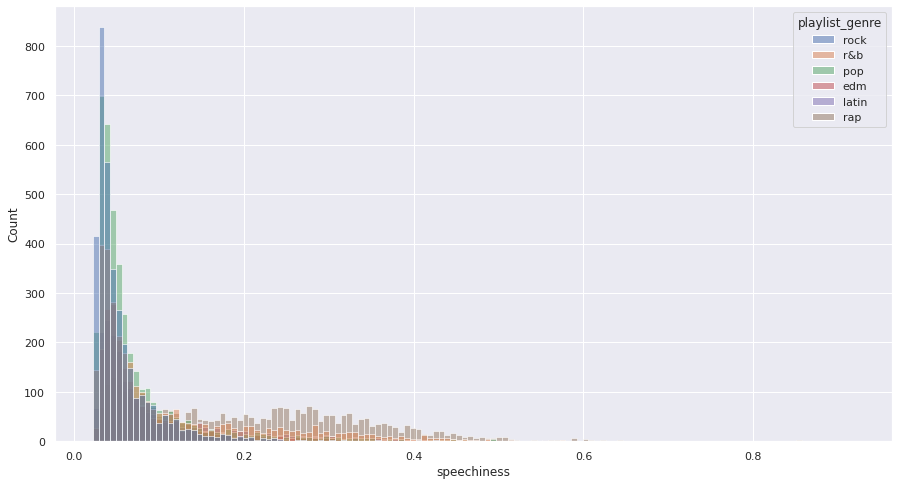

In [ ]:

sns.set(rc={'figure.figsize':(15,8)})
sns.histplot(x = spotify["speechiness"], hue = spotify["playlist_genre"])
plt.show()

## Track popularity overview

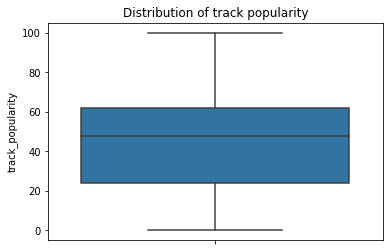

In [ ]:
sns.boxplot(y = spotify["track_popularity"])
plt.title("Distribution of track popularity")
plt.show()
# Looks good, distinctive enough to use.
# i.e. music only above a popularity 20 to use // however data set is compact, no need to drop rows

## Release year // **HERE NEW COLUMN**

In [ ]:
type(spotify["track_album_release_date"].unique()[0])

In [ ]:
spotify["len of release"] = spotify["track_album_release_date"].apply(lambda x: len(x))

In [ ]:
spotify["len of release"].unique()

array([10,  4,  7])

In [ ]:
spotify["track_album_release_date"][spotify["len of release"] == 4].unique() ## Here only year is present

array(['1981', '1987', '1997', '1971', '2001', '2005', '2013', '1993',
       '1986', '2007', '1985', '1989', '2004', '1974', '2008', '2012',
       '1996', '1969', '2006', '1967', '1972', '1984', '2014', '1976',
       '1991', '1960', '1988', '2000', '1992', '1995', '1994', '2011',
       '1978', '2003', '1979', '2015', '2010', '2016', '1970', '1980',
       '1983', '2009', '2002', '1975', '1998', '1973', '1977', '1965',
       '1999', '2017', '1968', '1990', '1982', '1964', '1966', '2019'],
      dtype=object)

In [ ]:
spotify["track_album_release_date"][spotify["len of release"] == 7].unique() ## Here month and year is present, but first 4 is the year

array(['1977-02', '1973-05', '1977-09', '1967-04', '1978-04', '1973-09',
       '1978-08', '1978-01', '1976-12', '1971-07', '1967-09', '1981-03',
       '1981-12', '1971-03', '1966-09', '1966-02', '1970-02', '1978-09',
       '1957-03'], dtype=object)

In [ ]:
spotify["track_album_release_date"][spotify["len of release"] == 10].unique() ## Here day, month and year is present, but first 4 is the year

array(['2001-01-01', '2017-11-21', '2005-01-01', ..., '1984-12-11',
       '1967-11-01', '1972-07-01'], dtype=object)

In [ ]:
spotify["year"] = spotify["track_album_release_date"].apply(lambda x: int(x[0:4]))

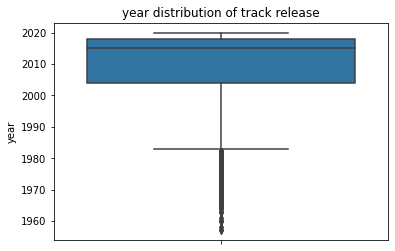

In [ ]:
sns.boxplot(y = spotify["year"])
plt.title("year distribution of track release")
plt.show()

In [ ]:
print(spotify["year"].unique())
print(len(spotify["year"].unique()))

[2001 2017 2005 2012 2019 1999 1989 2011 2015 2007 1978 2003 2016 2014
 2018 1976 1981 2013 1991 1998 2006 1987 1997 1986 1988 2020 1996 1977
 2009 1971 1961 2010 2004 2008 1993 2000 1995 2002 1974 1985 1990 1975
 1984 1980 1979 1973 1994 1969 1967 1972 1968 1960 1992 1983 1970 1982
 1965 1963 1966 1964 1958 1957]
62


## Playlists

In [ ]:
print(len(spotify["playlist_name"].unique()))
print(spotify["playlist_name"].unique())
# We have 442 different playlist_name, whihch is a lot to look through

In [ ]:
spotify.pivot_table(values = "track_id", index = "playlist_name", aggfunc="count").sort_values(by = "track_id", ascending = False).head(20)

,track_id
playlist_name,
Indie Poptimism,258
Permanent Wave,193
Southern Hip Hop,144
Hard Rock Workout,143
post teen pop,132
Urban Contemporary,128
New Jack Swing,118
permanent wave,116
Dance Pop,108


# Playlist genre and subgenre

In [ ]:
print(len(spotify["playlist_genre"].unique()))
print(spotify["playlist_genre"].unique())
print(len(spotify["playlist_subgenre"].unique()))
print(spotify["playlist_subgenre"].unique())

6
['rock' 'r&b' 'pop' 'edm' 'latin' 'rap']
24
['classic rock' 'hard rock' 'new jack swing' 'neo soul' 'dance pop'
 'urban contemporary' 'big room' 'hip pop' 'latin pop' 'indie poptimism'
 'gangster rap' 'album rock' 'post-teen pop' 'trap' 'latin hip hop'
 'southern hip hop' 'tropical' 'electropop' 'progressive electro house'
 'pop edm' 'reggaeton' 'hip hop' 'permanent wave' 'electro house']


## Playlist genre

In [ ]:
spotify.pivot_table(values = "track_id", index = "playlist_genre", aggfunc="count").sort_values(by = "track_id", ascending = False)

,track_id
playlist_genre,
pop,3993
rock,3521
rap,3391
r&b,3326
latin,2178
edm,2045


## Playlist subgenre

In [ ]:
print(spotify.pivot_table(values = "track_popularity", index = "playlist_subgenre", aggfunc="mean").sort_values(by = "track_popularity", ascending = False))

                           track_popularity
playlist_subgenre                          
hip hop                           57.249637
post-teen pop                     56.636364
dance pop                         56.330588
permanent wave                    53.901542
trap                              51.901325
hip pop                           50.437008
latin pop                         49.661616
urban contemporary                49.424145
reggaeton                         45.753425
tropical                          43.936575
electropop                        41.628631
latin hip hop                     41.465082
album rock                        41.437198
indie poptimism                   41.247671
classic rock                      39.396104
electro house                     38.681818
pop edm                           38.643478
southern hip hop                  36.722798
hard rock                         34.711663
neo soul                          34.263736
gangster rap                    

In [ ]:
print(spotify.pivot_table(values = "track_id", index = "playlist_subgenre", aggfunc="count").sort_values(by = "track_id", ascending = False))

                           track_id
playlist_subgenre                  
indie poptimism                1288
southern hip hop               1158
neo soul                       1001
electropop                      964
urban contemporary              936
hard rock                       926
classic rock                    924
post-teen pop                   891
new jack swing                  881
gangster rap                    865
dance pop                       850
permanent wave                  843
album rock                      828
hip hop                         689
trap                            679
latin hip hop                   673
progressive electro house       652
latin pop                       594
pop edm                         575
hip pop                         508
electro house                   484
tropical                        473
reggaeton                       438
big room                        334


# New dataset: Spotify_maingenre to check genre-numeric relations

In [ ]:
# If I make the genre to dummies, I can get the correlation with the last numerical columns.
# title_movies = pd.concat([title_movies, title_movies['genres'].str.get_dummies(',')], axis = 1)
spotify_maingenres = pd.concat([spotify, spotify["playlist_genre"].str.get_dummies()], axis = 1)

In [ ]:
# Okay, still not understanding numbers... 
spotify_maingenres.corr()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year,edm,latin,pop,r&b,rap,rock
track_popularity,1.000000,0.061499,-0.093521,-0.006878,0.031290,0.010947,-0.000622,0.076821,-0.080933,-0.059334,-0.004490,0.011954,-0.143970,0.079729,-0.128232,0.039541,0.118376,-0.064552,0.015642,-0.006348
danceability,0.061499,1.000000,-0.089708,0.002090,0.022830,-0.078020,0.204041,-0.029240,-0.049187,-0.114719,0.343419,-0.201465,-0.133803,0.164884,-0.008060,0.157447,-0.026485,0.071611,0.251848,-0.413367
energy,-0.093521,-0.089708,1.000000,0.018833,0.674795,-0.009903,-0.011986,-0.546033,0.042093,0.156931,0.207941,0.138291,-0.021134,0.046451,0.221985,0.031247,0.028477,-0.278990,-0.058132,0.097377
key,-0.006878,0.002090,0.018833,1.000000,0.007280,-0.169589,0.026282,-0.002067,0.004243,0.000682,0.021927,-0.018967,0.016984,0.005536,-0.002799,0.011804,-0.010781,0.007031,0.011384,-0.014257
loudness,0.031290,0.022830,0.674795,0.007280,1.000000,-0.035276,0.029858,-0.370628,-0.099164,0.071159,0.050211,0.082558,-0.159026,0.360451,0.211981,0.071305,0.087022,-0.192820,0.015907,-0.146145
mode,0.010947,-0.078020,-0.009903,-0.169589,-0.035276,1.000000,-0.070013,0.022191,-0.002906,0.004850,-0.009382,0.026421,0.012433,-0.102181,-0.052884,-0.011702,0.024525,-0.052516,-0.045242,0.122119
speechiness,-0.000622,0.204041,-0.011986,0.026282,0.029858,-0.070013,1.000000,-0.000217,-0.108365,0.060072,0.035202,0.033620,-0.094343,0.141194,-0.072090,-0.020525,-0.168912,0.029059,0.459119,-0.229491
acousticness,0.076821,-0.029240,-0.546033,-0.002067,-0.370628,0.022191,-0.000217,1.000000,-0.015803,-0.067491,-0.069817,-0.096149,-0.052996,-0.002233,-0.156014,0.057801,-0.018231,0.183421,-0.022308,-0.061160
instrumentalness,-0.080933,-0.049187,0.042093,0.004243,-0.099164,-0.002906,-0.108365,-0.015803,1.000000,-0.000021,-0.103020,0.028126,0.078505,0.010352,0.202108,-0.063632,0.016590,-0.081453,-0.072411,0.024453
liveness,-0.059334,-0.114719,0.156931,0.000682,0.071159,0.004850,0.060072,-0.067491,-0.000021,1.000000,-0.006931,0.015658,0.026988,-0.024563,0.046619,-0.005222,-0.042894,-0.048307,0.021025,0.038528


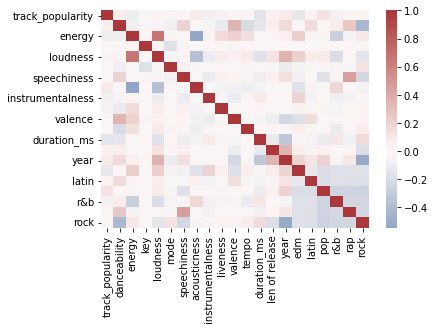

In [ ]:
sns.heatmap(spotify_maingenres.corr(),
            center = 0,
            cmap = sns.color_palette("vlag", as_cmap=True),
            )
plt.show()

In [ ]:
print(np.sum(spotify_maingenres.corr() > 0.5)) 
print(np.sum(spotify_maingenres.corr() < -0.5))

In [ ]:

print(spotify.pivot_table(values = ["track_id", "loudness", "danceability",	"energy",	"key",	"mode",	"speechiness",	"acousticness",	\
                                    "instrumentalness",	"liveness",	"valence",	"tempo",	"duration_ms"], index = "playlist_subgenre", \
                          aggfunc={"track_id":"count", "loudness": "mean", "danceability": "mean",	"energy": "mean",	"key": "mean",	"mode": "mean",\
                                   "speechiness": "mean",	"acousticness": "mean",	"instrumentalness": "mean",	"liveness": "mean",	"valence": "mean",\
                                   "tempo": "mean",	"duration_ms": "mean"}).sort_values(by = "track_id", ascending = False))

                           acousticness  danceability  ...  track_id   valence
playlist_subgenre                                      ...                    
indie poptimism                0.227738      0.623902  ...      1288  0.464140
southern hip hop               0.117853      0.708974  ...      1158  0.544583
neo soul                       0.315956      0.643286  ...      1001  0.501202
electropop                     0.133996      0.639820  ...       964  0.521197
urban contemporary             0.314243      0.640040  ...       936  0.463782
hard rock                      0.049481      0.478299  ...       926  0.472390
classic rock                   0.196852      0.541994  ...       924  0.610733
post-teen pop                  0.140801      0.633199  ...       891  0.563136
new jack swing                 0.137572      0.721216  ...       881  0.656687
gangster rap                   0.141301      0.722049  ...       865  0.496159
dance pop                      0.143580      0.65529

In [ ]:
spotify_maingenres.columns

Index(['track_id', 'track_name', 'track_artist', 'lyrics', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'language', 'len of release', 'year', 'edm', 'latin',
       'pop', 'r&b', 'rap', 'rock'],
      dtype='object')

## Visualization / pairplot

In [ ]:
pairplot = spotify_maingenres[["playlist_genre", "loudness", "track_popularity", "danceability",	"energy",	"key",	"mode",	"speechiness",	"acousticness",	\
                                    "instrumentalness",	"liveness",	"valence",	"tempo",	"duration_ms"]].sample(frac=0.2, random_state = 24)

In [ ]:
sns.pairplot(data = spotify_maingenres[['track_popularity', 'playlist_genre', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', \
                                        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','duration_ms', 'year', 'edm', 'latin', \
                                        'pop', 'r&b', 'rap', 'rock']].sample(frac=0.2, random_state = 24),
             hue = "playlist_genre")
plt.show()

In [ ]:
columns_features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', \
                    'valence', 'tempo']
len(columns_features)

11

# Creating compact dataset

**If completely rerun the colab** start with spotify and year column!

**1 step**: creating from all spotify columns

In [ ]:
spotify_compact = spotify[['track_id', 'track_name', 'track_artist', 'lyrics', 'track_popularity', 'track_album_name', 'playlist_name', 'playlist_id', \
                           'playlist_genre', 'playlist_subgenre', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',\
                           'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'language', 'year']].copy()

**2nd step**: creating decade column

In [ ]:
spotify_compact["decade"] = spotify_compact["year"].apply(lambda x: 1950 if 1960> x >= 1950 else 1960 if 1970> x >= 1960 else 1970 if 1980> x >= 1970 \
                                                          else 1980 if 1990 > x >=1980 else 1990 if 2000 > x >= 1990 else 2000 if 2010 > x >= 2000 \
                                                          else 2010 if 2020 > x >= 2010 else 2020)

In [ ]:
spotify_compact.columns

Index(['track_id', 'track_name', 'track_artist', 'lyrics', 'track_popularity',
       'track_album_name', 'playlist_name', 'playlist_id', 'playlist_genre',
       'playlist_subgenre', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'language', 'year', 'decade'],
      dtype='object')

**3rd step**: dropping year

In [ ]:
spotify_compact = spotify_compact[['track_id', 'track_name', 'track_artist', 'track_popularity', 'track_album_name', \
                                   'danceability', 'energy', 'speechiness','decade']]

In [ ]:
# Check if decade was working
# spotify[spotify_compact["decade"] == 2020]

In [ ]:
# Check if decade was working
# spotify_compact["decade"].unique()

array([2000, 2010, 1990, 1980, 1970, 2020, 1960, 1950])

**4th step**: sort the dataset based on popularity

In [ ]:
spotify_compact = spotify_compact.sort_values(by = "track_popularity", ascending = False)

**5th step**: create the links instead of id

In [ ]:
spotify_compact["track_id"] = spotify["track_id"].apply(lambda x: "https://open.spotify.com/track/" + x)

**6th step**: rename some columns

In [ ]:
spotify_compact.rename(columns={"track_artist": "Artist", "track_name": "Track Name", "track_album_name": "Album", "track_id": "Link"}, inplace=True)

In [ ]:
spotify_compact.columns
spotify_compact.head()

,Artist,Track Name,Album,Link,track_popularity,danceability,energy,speechiness,decade
6925,Tones and I,Dance Monkey,Dance Monkey (Stripped Back) / Dance Monkey,https://open.spotify.com/track/2XU0oxnq2qxCpom...,100,0.824,0.588,0.0924,2010
14477,Arizona Zervas,ROXANNE,ROXANNE,https://open.spotify.com/track/696DnlkuDOXcMAn...,99,0.621,0.601,0.1480,2010
4813,Post Malone,Circles,Hollywood's Bleeding,https://open.spotify.com/track/21jGcNKet2qwijl...,98,0.695,0.762,0.0395,2010
1754,The Weeknd,Blinding Lights,Blinding Lights,https://open.spotify.com/track/0sf12qNH5qcw8qp...,98,0.513,0.796,0.0629,2010
1375,Roddy Ricch,The Box,Please Excuse Me For Being Antisocial,https://open.spotify.com/track/0nbXyq5TXYPCO7p...,98,0.896,0.586,0.0559,2010


**7th step**: adjust the order of columns

In [ ]:
spotify_compact = spotify_compact[["Artist", "Track Name", "Album", "Link", 'track_popularity',\
                                   'danceability', 'energy', 'speechiness','decade']]

**Save it**

In [ ]:
spotify_compact.to_csv('/content/drive/MyDrive/spotify_clean.csv',  index = False)

# Clustering tracks

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
# All the numerical columns
X = spotify_compact[['track_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', \
                     'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'decade']]

# Standardize the data:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [ ]:
silhouette_list = []
for item2 in range(2,20):
    modelKM = KMeans(n_clusters=item2, random_state = 24)
    modelKM.fit(X_scaled)
    silhouette_list.append(silhouette_score(X_scaled, modelKM.labels_))
    
print("The best option to create "+ str(silhouette_list.index(max(silhouette_list))+2) + \
      " clusters, where silhouette score is :" + str(max(silhouette_list)) + ".")

The best option to create 2 clusters, where silhouette score is :0.14220787626198245.


# Trying out different filters / vibe categories

In [ ]:
sns.histplot(x = spotify_compact["tempo"], hue = spotify_compact["playlist_genre"])
plt.show()

In [ ]:
sns.histplot(x = spotify_compact["energy"], hue = spotify_compact["playlist_genre"])
plt.show()

In [ ]:
# Energy
sns.boxplot(x = spotify_compact["playlist_genre"], y = spotify_compact["energy"])
plt.show()

In [ ]:
# Tempo
sns.boxplot(x = spotify_compact["playlist_genre"], y = spotify_compact["tempo"])
plt.show()

In [ ]:
spotify_compact.columns

In [ ]:
# Dance
sns.boxplot(x = spotify_compact["playlist_genre"], y = spotify_compact["danceability"])
plt.show()

In [ ]:
# Key
sns.boxplot(x = spotify_compact["playlist_genre"], y = spotify_compact["key"])
plt.show()

In [ ]:
# Loudness
sns.boxplot(x = spotify_compact["playlist_genre"], y = spotify_compact["loudness"])
plt.show()

In [ ]:
# Speechiness
sns.boxplot(x = spotify_compact["playlist_genre"], y = spotify_compact["speechiness"])
plt.show()

In [ ]:
# Acousticness
sns.boxplot(x = spotify_compact["playlist_genre"], y = spotify_compact["acousticness"])
plt.show()

In [ ]:
# Instrumentalness
sns.boxplot(x = spotify_compact["playlist_genre"], y = spotify_compact["instrumentalness"])
plt.show()

In [ ]:
# Liveness
sns.boxplot(x = spotify_compact["playlist_genre"], y = spotify_compact["liveness"])
plt.show()

In [ ]:
# Valence
sns.boxplot(x = spotify_compact["playlist_genre"], y = spotify_compact["valence"])
plt.show()

Music vibes: 
- chill // energy <0.71 & 0.75> danceability > 0.55 // 4017  rows
- energetic and upbeat // energy > 0.71 & danceability > 0.66 // 4152 rows
- feelgood // 0.83 > energy >0.57 // 9063 rows
- cozy evening // energy <0.71 and danceability < 0.66 // 3977 rows
- cheerful and fun // energy > 0.71 & danceability > 0.55 // 6667
- friday night fever // energy > 0.71 & danceability > 0.66 // 4152
- friendly and calm // 0.75> danceability > 0.55 // 8773

In [ ]:
# Chill
chill = spotify_compact[(spotify_compact["energy"] < 0.71) & (spotify_compact["danceability"] > 0.55) & (spotify_compact["danceability"] < 0.75)]

In [ ]:
# Energetic and upbeat
energetic_and_upbeat = spotify_compact[(spotify_compact["energy"] > 0.71) & (spotify_compact["danceability"] > 0.66)]

In [ ]:
# Feelgood
feelgood = spotify_compact[(spotify_compact["energy"] > 0.57) & (spotify_compact["energy"] < 0.83)]

In [ ]:
# Cozy evening
cozy_evening = spotify_compact[(spotify_compact["energy"] < 0.71) & (spotify_compact["danceability"] < 0.66)]

In [ ]:
# Cheerful and fun 
cheerful_and_fun = spotify_compact[(spotify_compact["energy"] > 0.71) & (spotify_compact["danceability"] > 0.55)]

In [ ]:
# Friday night fever
friday_night_fever = spotify_compact[(spotify_compact["energy"] > 0.71) & (spotify_compact["danceability"] > 0.66)]

In [ ]:
# Friendly and calm
friendly_and_calm = spotify_compact[(spotify_compact["danceability"] < 0.75) & (spotify_compact["danceability"] > 0.55)]

Restaurant, sTreet bar, night bar, tee house

// Restaurant: background music: // maybe also cuisine?
- Fine Dining. - Casual Dining. - Contemporary Casual. - Family Style. - Fast Food. - Cafe.

Bar: 
- Beer hall. - Cocktail lounge. - Hotel bar. - Karaoke bar. - Music bar. - Sports bar. - Night Club

In [ ]:
spotify_compact[spotify_compact["loudness"] < -10]

In [ ]:
spotify_compact["speechiness"].describe()

count    18454.000000
mean         0.106192
std          0.102291
min          0.022400
25%          0.039700
50%          0.060300
75%          0.130000
max          0.918000
Name: speechiness, dtype: float64

In [ ]:
sns.boxplot(y = spotify_compact["speechiness"])

In [ ]:
spotify_compact.info()

In [ ]:
restaurant: < 0.04 speechiness
# tee_house < 0.04 speechiness
0.04 < streetbar < 0.13 speechiness
0.06 < night club speechiness

In [ ]:
chill[chill["speechiness"] < 0.04] # 1439 // restaurant or teehouse
chill[(chill["speechiness"] < 0.13) & (chill["speechiness"] > 0.04)] # 1654 // streetbar
chill[chill["speechiness"] > 0.06] # 1718 // night club

In [ ]:
cheerful_and_fun[cheerful_and_fun["speechiness"] < 0.04] # 1395 // restaurant or teehouse
cheerful_and_fun[(cheerful_and_fun["speechiness"] < 0.13) & (cheerful_and_fun["speechiness"] > 0.04)] # 3627 // streetbar
cheerful_and_fun[cheerful_and_fun["speechiness"] > 0.06] # 3489 // night club

In [ ]:
energetic_and_upbeat[energetic_and_upbeat["speechiness"] < 0.04] # 667 // restaurant or teehouse
energetic_and_upbeat[(energetic_and_upbeat["speechiness"] < 0.13) & (energetic_and_upbeat["speechiness"] > 0.04)] # 2323 // streetbar
energetic_and_upbeat[energetic_and_upbeat["speechiness"] > 0.06] # 2432 // night club

In [ ]:
sns.boxplot(y = spotify_compact["duration_ms"]/1000) # duration as sec.

In [ ]:
spotify_compact[spotify_compact["duration_ms"]/1000 < 100]